In [120]:
import pandas as pd

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', None)

In [248]:
#LÊ DADOS E EXCLUI PRIMEIRAS 5 COLUNAS
df = pd.read_csv("data.csv", sep=";", decimal=',')
df = df.iloc[:, 5:]
display(df)

,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,NO_MODALIDADE_CONCORRENCIA,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO,ENSINO_MEDIO,QUILOMBOLA,DEFICIENTE,TIPO_CONCORRENCIA
0,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,709.94,635.54,1,S,N,N,AC
1,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,683.18,635.54,2,S,N,N,AC
2,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,679.78,635.54,3,N,N,N,AC
3,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,679.76,635.54,4,N,N,N,AC
4,Campus Florestal,1126514,ADMINISTRAÇÃO,Noturno,Bacharelado,30,Ampla concorrência,NÃO,NaN,NaN,678.22,635.54,5,N,N,N,AC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,Campus Viçosa,701,ZOOTECNIA,Integral,Bacharelado,6,"Candidatos que, independentemente da renda, tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012).",NÃO,NaN,NaN,658.90,650.68,2,S,N,N,LI_EP
3190,Campus Viçosa,701,ZOOTECNIA,Integral,Bacharelado,6,"Candidatos que, independentemente da renda, tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012).",NÃO,NaN,NaN,658.28,650.68,3,S,N,N,LI_EP
3191,Campus Viçosa,701,ZOOTECNIA,Integral,Bacharelado,6,"Candidatos que, independentemente da renda, tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012).",NÃO,NaN,NaN,652.12,650.68,4,S,N,N,LI_EP
3192,Campus Viçosa,701,ZOOTECNIA,Integral,Bacharelado,6,"Candidatos que, independentemente da renda, tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012).",NÃO,NaN,NaN,651.62,650.68,5,S,N,N,LI_EP


NO_CAMPUS           
Campus Viçosa           2300
Campus Rio Paranaíba     529
Campus Florestal         365
Name: count, dtype: int64

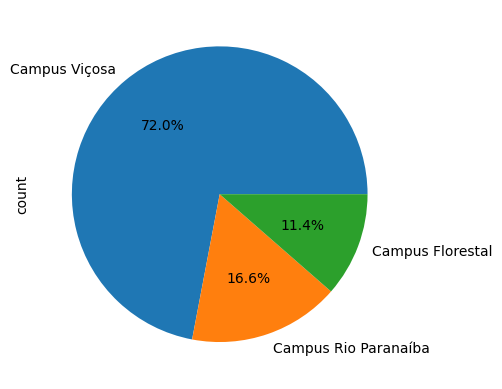

In [249]:
display(df[["NO_CAMPUS"]].value_counts())
df["NO_CAMPUS"].value_counts().plot(kind='pie', autopct='%1.1f%%');

In [250]:
display(df[['NO_CAMPUS', 'NO_CURSO']].groupby('NO_CAMPUS').agg(lambda x : ' / '.join(set(x))).reset_index())

,NO_CAMPUS,NO_CURSO
0,Campus Florestal,CIÊNCIAS BIOLÓGICAS / CIÊNCIA DA COMPUTAÇÃO / ENGENHARIA DE ALIMENTOS / FÍSICA / EDUCAÇÃO FÍSICA / MATEMÁTICA / QUÍMICA / ADMINISTRAÇÃO / GESTÃO AMBIENTAL / AGRONOMIA
1,Campus Rio Paranaíba,CIÊNCIAS CONTÁBEIS / NUTRIÇÃO / CIÊNCIAS BIOLÓGICAS / ENGENHARIA DE PRODUÇÃO / SISTEMAS DE INFORMAÇÃO / ENGENHARIA CIVIL / QUÍMICA / ADMINISTRAÇÃO / AGRONOMIA / CIÊNCIA E TECNOLOGIA DE ALIMENTOS
2,Campus Viçosa,MEDICINA VETERINÁRIA / ENGENHARIA FLORESTAL / SECRETARIADO EXECUTIVO / ENGENHARIA DE ALIMENTOS / COMUNICAÇÃO SOCIAL - JORNALISMO / ENGENHARIA DE AGRIMENSURA E CARTOGRÁFICA / ENGENHARIA QUÍMICA / COOPERATIVISMO / BIOQUÍMICA / NUTRIÇÃO / ABI - QUíMICA / ABI - CIÊNCIAS BIOLÓGICAS / ENFERMAGEM / ABI - CIÊNCIAS SOCIAIS / ABI - GEOGRAFIA / PEDAGOGIA / ENGENHARIA CIVIL / CIÊNCIAS ECONÔMICAS / AGRONOMIA / ABI - HISTÓRIA / CIÊNCIA E TECNOLOGIA DE LATICÍNIOS / CIÊNCIAS CONTÁBEIS / ABI - EDUCAÇÃO FÍSICA / ABI - LETRAS / ABI - MATEMÁTICA / ENGENHARIA ELÉTRICA / DIREITO / ENGENHARIA MECÂNICA / ENGENHARIA AMBIENTAL / AGRONEGÓCIO / ABI - DANÇA / ARQUITETURA E URBANISMO / MEDICINA / CIÊNCIA DA COMPUTAÇÃO / ENGENHARIA DE PRODUÇÃO / SERVIÇO SOCIAL / ZOOTECNIA / EDUCAÇÃO INFANTIL / ABI - FÍSICA/ENGENHARIA FÍSICA / ENGENHARIA AGRÍCOLA E AMBIENTAL / ADMINISTRAÇÃO


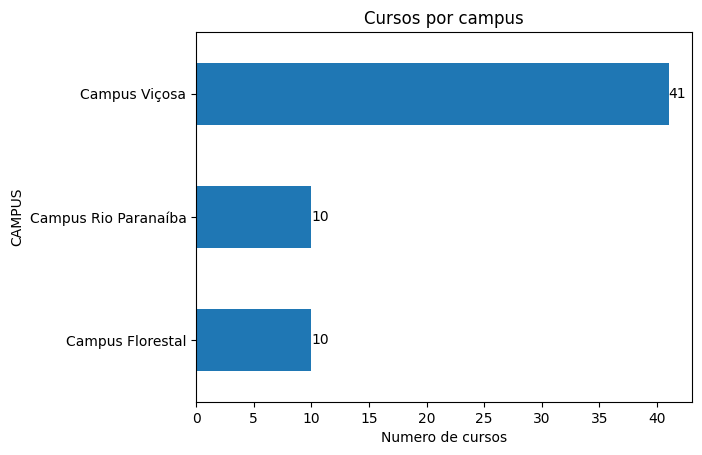

In [251]:
ax = df[['NO_CAMPUS', 'NO_CURSO']].rename(columns={'NO_CAMPUS': 'CAMPUS'}).groupby('CAMPUS').nunique()\
        .plot(kind='barh', xlabel='Numero de cursos', title="Cursos por campus");
ax.get_legend().remove();
ax.bar_label(ax.containers[0]);

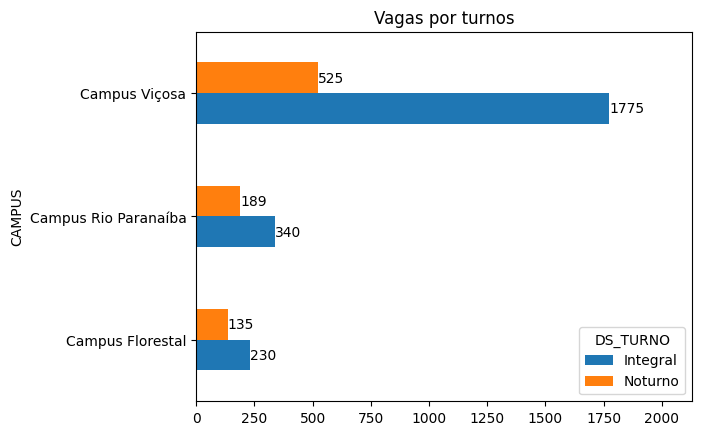

In [252]:
ax = df[['NO_CAMPUS', 'DS_TURNO', 'NU_CLASSIFICACAO']].groupby(['NO_CAMPUS', 'DS_TURNO']).count().unstack()\
.rename(columns={'DS_TURNO': 'Turno'}).droplevel(level=0, axis=1).plot(kind='barh', title="Vagas por turnos")
ax.margins(x=0.2)
ax.set_ylabel("CAMPUS")
for container in ax.containers:
    ax.bar_label(container);

<h3> Cursos divididos por campus e número de vagas oferecidas </h3>

In [253]:
display(df[['NO_CAMPUS', 'NO_CURSO', 'QT_VAGAS_CONCORRENCIA']].groupby(['NO_CAMPUS', 'NO_CURSO']).count()\
                            .reset_index().groupby(['NO_CAMPUS','QT_VAGAS_CONCORRENCIA']).agg(lambda x : ' / '.join(set(x))))

NO_CURSO
NO_CAMPUS            QT_VAGAS_CONCORRENCIA                                                                                                                                                                                                                                                                                                                                              
Campus Florestal     12                                                                                                                                                                                                                                                                                                                                                          QUÍMICA
                     17                                                                                                                                                                                                                                                                                                                                                       MATEMÁTICA
                     19                                                                                                                                                                                                                                                                                                                                                           FÍSICA
                     25                                                                                                                                                                                                                                                                                                                                             CIÊNCIAS BIOLÓGICAS 
                     42                                                                                                                                                                                                                                                                                                                                                 GESTÃO AMBIENTAL
                     45                                                                                                                                                                                                                                                                                                                              AGRONOMIA / ENGENHARIA DE ALIMENTOS
                     50                                                                                                                                                                                                                                                                                                                          EDUCAÇÃO FÍSICA / CIÊNCIA DA COMPUTAÇÃO
                     60                                                                                                                                                                                                                                                                                                                                                    ADMINISTRAÇÃO
Campus Rio Paranaíba 15                                                                                                                                                                                                                                                                                                                                CIÊNCIA E TECNOLOGIA DE ALIMENTOS
                     24                                                                                                                                                                                                      

<h3> Cursos comuns em todos os campus (desconsiderando a diferenciação de ABIs) </h3>

In [254]:
display(df[['NO_CAMPUS', 'NO_CURSO', 'QT_VAGAS_CONCORRENCIA']].assign(NO_CURSO = lambda x: x.NO_CURSO.str.replace('ABI - ', '').str.upper())\
        .groupby(['NO_CURSO', 'NO_CAMPUS']).count().unstack().dropna().astype(int).reset_index())

NO_CURSO QT_VAGAS_CONCORRENCIA                       \
NO_CAMPUS                     Campus Florestal Campus Rio Paranaíba   
0          ADMINISTRAÇÃO                    60                  100   
1              AGRONOMIA                    45                   50   
2                QUÍMICA                    12                   24   

                         
NO_CAMPUS Campus Viçosa  
0                    60  
1                   210  
2                   100

In [255]:
display(df[['TIPO_CONCORRENCIA', 'NO_MODALIDADE_CONCORRENCIA']].drop_duplicates().reset_index(drop=True))

,TIPO_CONCORRENCIA,NO_MODALIDADE_CONCORRENCIA
0,AC,Ampla concorrência
1,LB_PPI,"Candidatos autodeclarados pretos, pardos ou indígenas, com renda familiar bruta per capita igual ou inferior a 1 salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012)."
2,LI_PPI,"Candidatos autodeclarados pretos, pardos ou indígenas, independentemente da renda, que tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012)."
3,LB_Q,"Candidatos autodeclarados quilombolas, com renda familiar bruta per capita igual ou inferior a 1 salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012)."
4,LI_PCD,"Candidatos com deficiência, independentemente da renda, que tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012)."
5,LB_EP,Candidatos com renda familiar bruta per capita igual ou inferior a 1 salário mínimo que tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012).
6,LI_EP,"Candidatos que, independentemente da renda, tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012)."
7,LB_PCD,"Candidatos com deficiência, que tenham renda familiar bruta per capita igual ou inferior a 1 salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas ou em escolas comunitárias que atuam no âmbito da educação do campo conveniadas com o poder público (Lei nº 12.711/2012)"


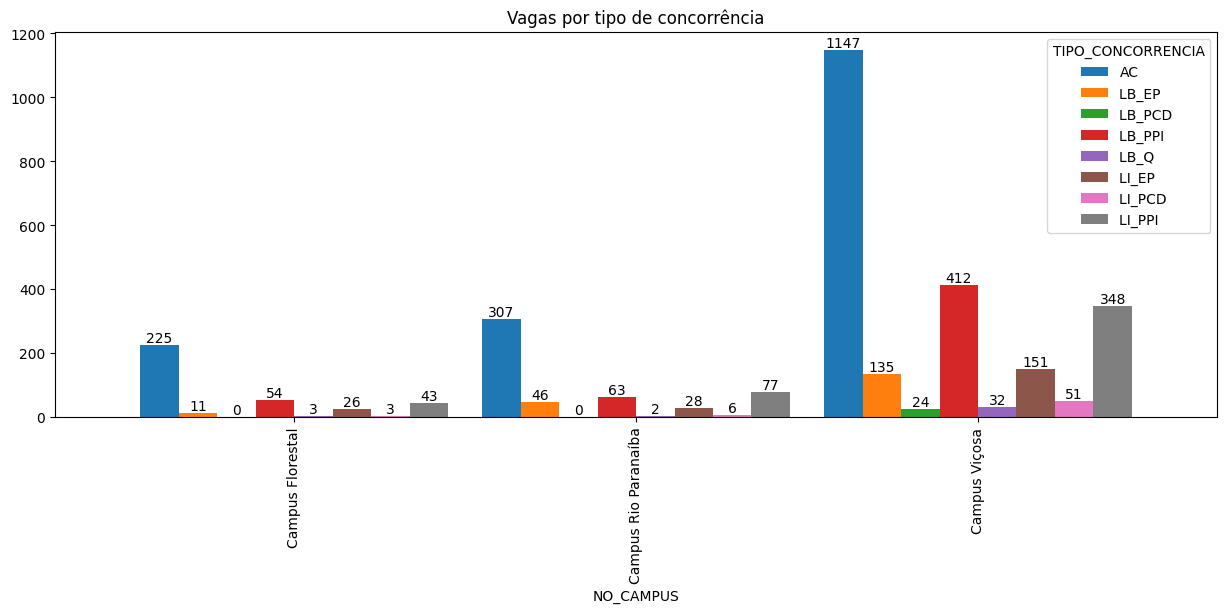

In [256]:
ax = df[['NO_CAMPUS', 'TIPO_CONCORRENCIA', 'QT_VAGAS_CONCORRENCIA']].groupby(['NO_CAMPUS', 'TIPO_CONCORRENCIA']).count()\
        .unstack().droplevel(level = 0, axis=1).plot(kind='bar', title = "Vagas por tipo de concorrência", figsize=(15, 5), width=0.9);
for container in ax.containers:
    ax.bar_label(container);

In [257]:
display(df[['NO_CAMPUS', 'TIPO_CONCORRENCIA', 'NU_NOTA_CANDIDATO']].groupby(['TIPO_CONCORRENCIA','NO_CAMPUS'])\
        .agg(['max', 'min']).droplevel(level = 0, axis = 1).stack().unstack(level=[1,2]).fillna(' '))

NO_CAMPUS         Campus Florestal         Campus Rio Paranaíba          \
                               max     min                  max     min   
TIPO_CONCORRENCIA                                                         
AC                          758.58  391.18               755.82  379.74   
LB_EP                       686.02  348.44               662.56  333.18   
LB_PCD                                                                    
LB_PPI                      650.94  500.46               589.54  401.96   
LB_Q                        528.76  406.32                540.5  487.82   
LI_EP                       713.78  511.92               666.22  412.16   
LI_PCD                       594.0  376.86               602.94  466.82   
LI_PPI                      678.26  429.72               652.98   406.3   

NO_CAMPUS         Campus Viçosa          
                            max     min  
TIPO_CONCORRENCIA                        
AC                       806.26  566.98  
LB_EP                    778.04  546.46  
LB_PCD                   728.76  400.38  
LB_PPI                   741.10  284.20  
LB_Q                     741.90  404.60  
LI_EP                    796.30  559.48  
LI_PCD                   752.60  299.64  
LI_PPI                   769.40  489.46

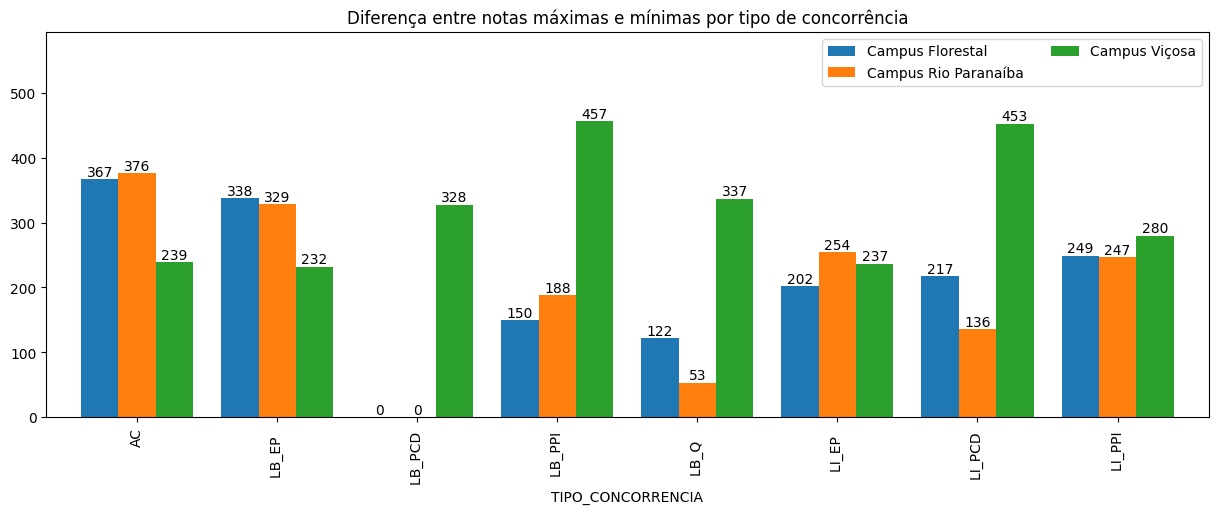

In [324]:
ax = df[['NO_CAMPUS', 'TIPO_CONCORRENCIA', 'NU_NOTA_CANDIDATO']].groupby(['TIPO_CONCORRENCIA','NO_CAMPUS'])\
.agg(lambda x : round(float(x.values.max()) - float(x.values.min()))).unstack()\
.droplevel(level = 0, axis = 1).plot(kind = 'bar', figsize = (15, 5), width=0.8, title= "Diferença entre notas máximas e mínimas por tipo de concorrência")
ax.legend(loc='best', ncols = 2)
ax.margins(y=0.3)
for container in ax.containers:
    ax.bar_label(container);

In [259]:
display(df[['NO_CAMPUS', 'TIPO_CONCORRENCIA', 'NO_CURSO', 'NU_NOTA_CANDIDATO']].groupby(['NO_CAMPUS', 'NO_CURSO', 'TIPO_CONCORRENCIA'])\
        .agg(['max', 'min']).droplevel(level = 0, axis = 1).stack().unstack(level=[2,3]).fillna(' '))

TIPO_CONCORRENCIA                                                  AC          \
                                                                  max     min   
NO_CAMPUS            NO_CURSO                                                   
Campus Florestal     ADMINISTRAÇÃO                             709.94  635.54   
                     AGRONOMIA                                 732.30  657.44   
                     CIÊNCIA DA COMPUTAÇÃO                     748.78  714.14   
                     CIÊNCIAS BIOLÓGICAS                       693.58  644.00   
                     EDUCAÇÃO FÍSICA                           684.12  613.18   
                     ENGENHARIA DE ALIMENTOS                   758.58  567.14   
                     FÍSICA                                    678.84  437.86   
                     GESTÃO AMBIENTAL                          728.12  391.18   
                     MATEMÁTICA                                724.78  511.70   
                     QUÍMICA                                   677.58  503.50   
Campus Rio Paranaíba ADMINISTRAÇÃO                             697.86  591.16   
                     AGRONOMIA                                 755.82  658.14   
                     CIÊNCIA E TECNOLOGIA DE ALIMENTOS         567.88  379.74   
                     CIÊNCIAS BIOLÓGICAS                       733.38  631.50   
                     CIÊNCIAS CONTÁBEIS                        719.02  627.86   
                     ENGENHARIA CIVIL                          701.34  650.14   
                     ENGENHARIA DE PRODUÇÃO                    723.22  478.48   
                     NUTRIÇÃO                                  703.30  676.80   
                     QUÍMICA                                   685.64  462.16   
                     SISTEMAS DE INFORMAÇÃO                    717.96  645.16   
Campus Viçosa        ABI - CIÊNCIAS BIOLÓGICAS                 793.06  677.96   
                     ABI - CIÊNCIAS SOCIAIS                    749.06  633.46   
                     ABI - DANÇA                               665.98  629.16   
                     ABI - EDUCAÇÃO FÍSICA                     711.70  654.48   
                     ABI - FÍSICA/ENGENHARIA FÍSICA            761.52  644.02   
                     ABI - GEOGRAFIA                           699.78  604.64   
                     ABI - HISTÓRIA                            734.86  659.42   
                     ABI - LETRAS                              717.78  633.38   
                     ABI - MATEMÁTICA                          731.48  585.46   
                     ABI - QUíMICA                             730.88  610.32   
                     ADMINISTRAÇÃO                             721.36  673.86   
                     AGRONEGÓCIO                               707.54  647.78   
                     AGRONOMIA                                 777.32  693.58   
                     ARQUITETURA E URBANISMO                   745.84  721.06   
                     BIOQUÍMICA                                744.96  695.70   
                     CIÊNCIA DA COMPUTAÇÃO                     781.66  751.82   
                     CIÊNCIA E TECNOLOGIA DE LATICÍNIOS        714.82  614.20   
                     CIÊNCIAS CONTÁBEIS                        709.80  669.12   
                     CIÊNCIAS ECONÔMICAS                       749.46  695.70   
                     COMUNICAÇÃO SOCIAL - JORNALISMO           740.16  685.16   
                     COOPERATIVISMO                            653.82  592.36   
                     DIREITO                                   777.68  738.94   
                     EDUCAÇÃO INFANTIL                         663.02  566.98   
                     ENFERMAGEM                                745.16  704.48   
                     ENGENHARIA AGRÍCOLA E AMBIENTAL           732.74  656.68   
                     ENGENHARIA AMBIENTAL                      726.00  679.70   
                     ENGENHARIA

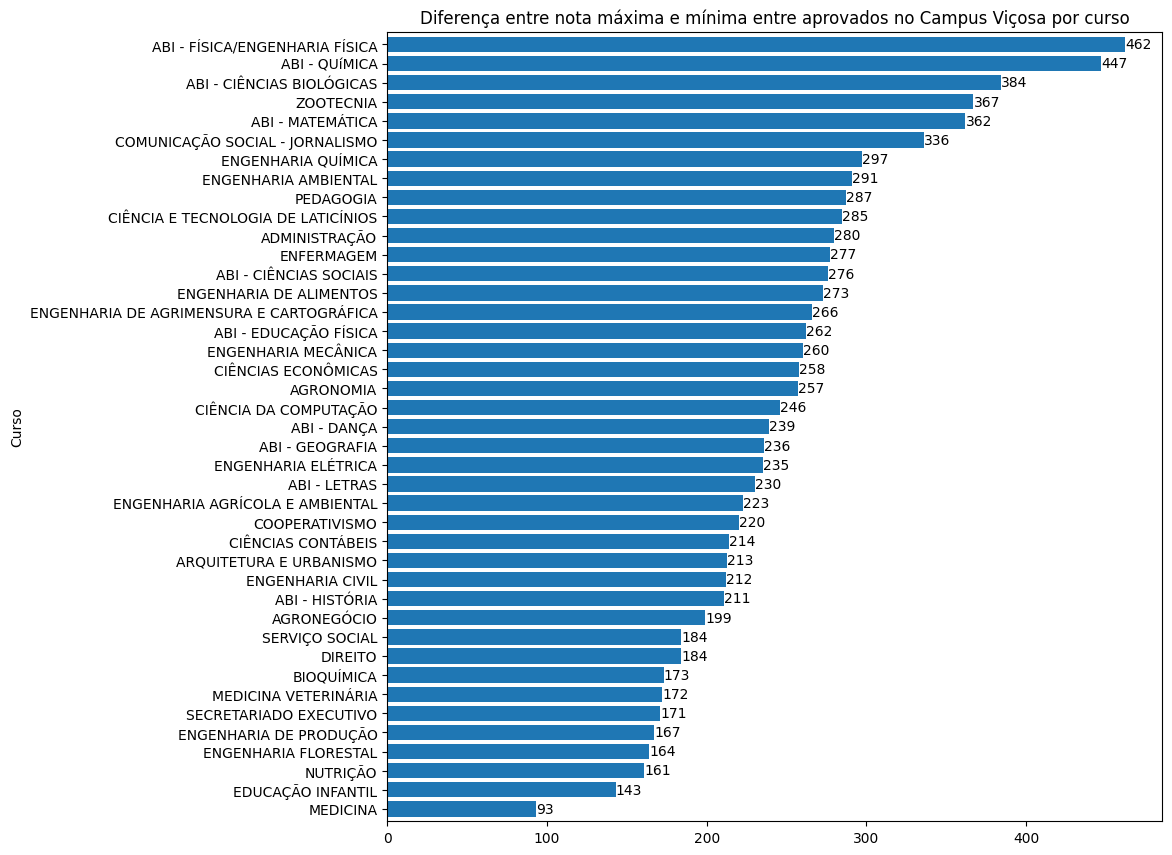

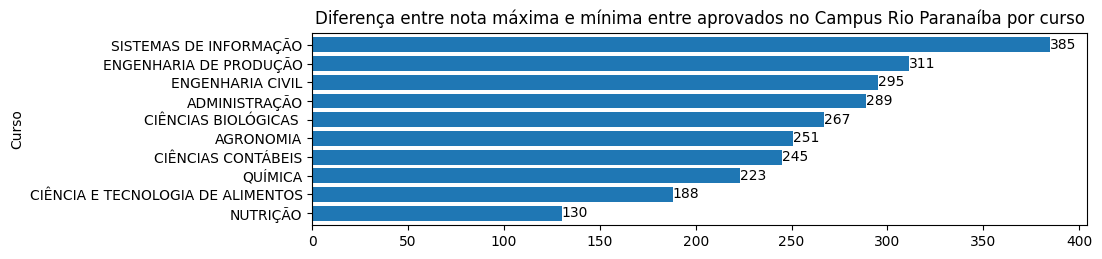

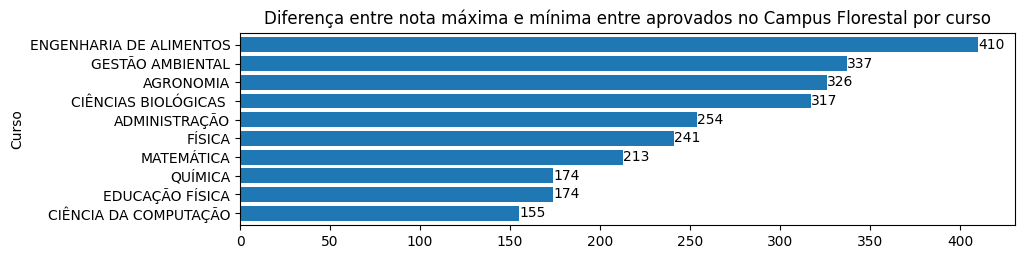

In [325]:
campi = set(df['NO_CAMPUS'])

for campus in campi: 
    numero_de_cursos = len(set(df[df['NO_CAMPUS'] == campus]['NO_CURSO']))
    titulo = f"Diferença entre nota máxima e mínima entre aprovados no {campus} por curso"
    ax = df[df['NO_CAMPUS'] == campus][['NO_CURSO', 'NU_NOTA_CANDIDATO']].groupby('NO_CURSO')\
            .agg(lambda x: round(x.values.max() - x.values.min())).fillna(' ')\
            .sort_values(by='NU_NOTA_CANDIDATO')\
            .plot(kind = 'barh', figsize = (10, 0.25*numero_de_cursos), width=0.8, title=titulo);
    ax.get_legend().remove()
    ax.set_ylabel("Curso")
    for container in ax.containers:
        ax.bar_label(container);